# Project Description: House Price Prediction

**Dataset:** [House Prediction Dataset](https://www.kaggle.com/datasets/zafarali27/house-price-prediction-dataset)  
**Columns:**  
- `Id`  
- `Area`  
- `Bedrooms`  
- `Bathrooms`  
- `Floors`  
- `YearBuilt`  
- `Location`  
- `Condition`  
- `Garage`  
- `Price` (Target Variable)
---

## Project Phases

- Phase 1: Data Understanding & Exploration
- Phase 2: Data Preprocessing
- Phase 3: Model Training
- Phase 4: Model Evaluation
- Phase 5: Model Comparison

---

## Tools
- **Python**
- **pandas**
- **scikit-learn**
- **matplotlib / seaborn**


#### ✅ Impoer libs

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Machine learning models & tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

### ✅ Data Understanding & Exploration

#### ✅ Load Data

In [2]:
df = df = pd.read_csv("House Price Prediction Dataset.csv")

In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


#### ✅ Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2000.0,1000.5000,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Area,2000.0,2786.2095,1295.146799,501.0,1653.00,2833.0,3887.50,4999.0
Bedrooms,2000.0,3.0035,1.424606,1.0,2.00,3.0,4.00,5.0
Bathrooms,2000.0,2.5525,1.108990,1.0,2.00,3.0,4.00,4.0
Floors,2000.0,1.9935,0.809188,1.0,1.00,2.0,3.00,3.0
YearBuilt,2000.0,1961.4460,35.926695,1900.0,1930.00,1961.0,1993.00,2023.0
Price,2000.0,537676.8550,276428.845719,50005.0,300098.00,539254.0,780086.00,999656.0


In [6]:
df.columns.tolist()

['Id',
 'Area',
 'Bedrooms',
 'Bathrooms',
 'Floors',
 'YearBuilt',
 'Location',
 'Condition',
 'Garage',
 'Price']

`There are no nulss so --->`
#### ✅ Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

#### ✅ Check Outliers 

In [8]:
columnn = 1
rown = 1
for column in df.select_dtypes(include="number").columns:
    print(f"""
fig.add_trace(go.Box(x=df['{column}']),row={rown}, col={columnn})""")
    columnn+=1
    if columnn > 4 : # i will put 4 columns for each row 
        columnn=1 
        rown+=1

# we need subtitles also we will use for loop
for column in df.select_dtypes(exclude='object').columns :
    print(f"'Box Plot for {column}'")


fig.add_trace(go.Box(x=df['Id']),row=1, col=1)

fig.add_trace(go.Box(x=df['Area']),row=1, col=2)

fig.add_trace(go.Box(x=df['Bedrooms']),row=1, col=3)

fig.add_trace(go.Box(x=df['Bathrooms']),row=1, col=4)

fig.add_trace(go.Box(x=df['Floors']),row=2, col=1)

fig.add_trace(go.Box(x=df['YearBuilt']),row=2, col=2)

fig.add_trace(go.Box(x=df['Price']),row=2, col=3)
'Box Plot for Id'
'Box Plot for Area'
'Box Plot for Bedrooms'
'Box Plot for Bathrooms'
'Box Plot for Floors'
'Box Plot for YearBuilt'
'Box Plot for Price'


In [ ]:
# let's create the subplots now
# we will put 4 columns for each row
# and we have 7 numerical columns so we will need 2 rows
# we will use horizontal_spacing to give some space between the plots
# we will use subplot_titles to give titles to each subplot
# this will show us the outliers in each numerical column
# we will use go.Box to create the box plots
fig = make_subplots(rows =2,
                   cols=4,
                    subplot_titles=['Box Plot for Id'
                                    'Box Plot for Area'
                                    'Box Plot for Bedrooms'
                                    'Box Plot for Bathrooms'
                                    'Box Plot for Floors'
                                    'Box Plot for YearBuilt'
                                    'Box Plot for Price'
                                    ],horizontal_spacing=0.1)

fig.add_trace(go.Box(x=df['Id']),row=1, col=1)

fig.add_trace(go.Box(x=df['Area']),row=1, col=2)

fig.add_trace(go.Box(x=df['Bedrooms']),row=1, col=3)

fig.add_trace(go.Box(x=df['Bathrooms']),row=1, col=4)

fig.add_trace(go.Box(x=df['Floors']),row=2, col=1)

fig.add_trace(go.Box(x=df['YearBuilt']),row=2, col=2)

fig.add_trace(go.Box(x=df['Price']),row=2, col=3)

fig.update_layout(
    title_text='Outliers Detection By Box Plot',
    showlegend=False,
    height=600,
    width=1750
)

### ✅ Data Preprocessing

#### ✅ Split to X and Y

In [ ]:
# we need to split the data into features and target variable
# target variable is 'Price'
# features are all other columns
# we will use df.drop to drop the target variable from the dataframe
# we will use df['Price'] to get the target variable
x = df.drop(columns='Price')
y = df['Price']

#### ✅ Encoding Categorical

In [ ]:
# let's see the categorical columns
df.select_dtypes(include='object').columns.tolist()

['Location', 'Condition', 'Garage']

In [ ]:
# we have 3 categorical columns 'Location', 'Condition', 'Garage'
# we will use LabelEncoder to convert them into numerical values
# we will fit and transform each column separately
le = LabelEncoder()
x["Location"] = le.fit_transform(x['Location'])
x['Condition'] = le.fit_transform(x['Condition'])
x['Garage'] = le.fit_transform(x['Garage'])

#### ✅ Scale Data

In [ ]:
# now we will scale the features using StandardScaler
# we will fit and transform the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### ✅ Train and Test Split

In [ ]:
# now we will split the data into training and testing sets
# we will use train_test_split from sklearn
# we will use 20% of the data for testing
# we will set random_state to 42 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

### ✅ Model Training 

#### ✅ Train with LinearRegression 

In [ ]:
# let's try Linear Regression model first
model = LinearRegression()
model.fit(x_train,y_train)

y_predict = model.predict(x_test)

# we will evaluate the model using MSE and R2 score
# we will use mean_squared_error and r2_score from sklearn.metrics
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test,y_predict))
print("R2:", r2_score(y_test, y_predict))
print("-"*40)

Linear Regression:
MSE: 78663273949.43434
R2: -0.011111291082151142
----------------------------------------


### ✅ Model Evaluation 


In [ ]:
# let's create a helper function for model evaluation
# this function will take model name, model object, training and testing data as input
# and will return a dictionary with MSE, R2 and Cross-validation R2 (mean)
# we will use cross_val_score from sklearn.model_selection for cross-validation
# we will use 5-fold cross-validation and R2 as scoring metric
def model_evaluation(name, model, X_train, X_test, y_train, y_test):
    
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation 
    cv = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_R2_mean = np.mean(cv)

    return {
        "MSE": mse,
        "R2": r2,
        "CV R2 (mean)": cv_R2_mean
    }

# Evaluate all models
results = {}

results['Linear Regression'] = model_evaluation("Linear Regression", model, x_train, x_test, y_train, y_test)
# Convert to DataFrame
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n")
results_df

Model Evaluation Results:



,MSE,R2,CV R2 (mean)
Linear Regression,7.866327e+10,-0.011111,-0.005051


### ✅ Model Comparison

In [ ]:
# let's try Decision Tree model now
model_tree = DecisionTreeRegressor(random_state=10)
model_tree.fit(x_train,y_train)


y_predict_tree = model_tree.predict(x_test)

print("Decision Tree:")
print("MSE:", mean_squared_error(y_test,y_predict_tree))
print("R2:", r2_score(y_test, y_predict_tree))
print("-"*40)

Decision Tree:
MSE: 167223597167.3925
R2: -1.1494359278767297
----------------------------------------


In [ ]:
# last we will try Random Forest model
model_rf = RandomForestRegressor(random_state=10)
model_rf.fit(x_train,y_train)


y_predict_rf = model_rf.predict(x_test)

print("Random Forest:")
print("MSE:", mean_squared_error(y_test,y_predict_rf))
print("R2:", r2_score(y_test, y_predict_rf))
print("-"*40)

Random Forest:
MSE: 82683121497.32884
R2: -0.06278106072227252
----------------------------------------


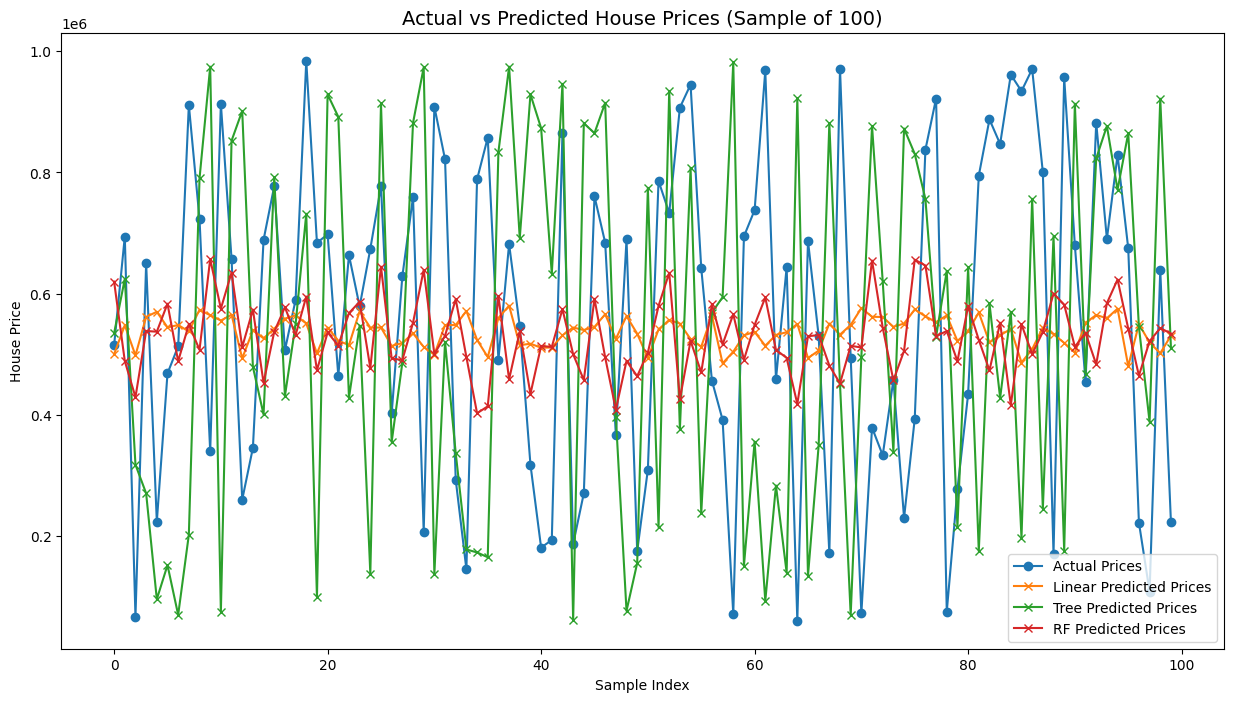

In [19]:
plt.figure(figsize=(15,8))

plt.plot(y_test.values[:100], label="Actual Prices", marker='o')  

# Plot predicted values
plt.plot(y_predict[:100], label="Linear Predicted Prices", marker='x')  
plt.plot(y_predict_tree[:100], label="Tree Predicted Prices", marker='x')  
plt.plot(y_predict_rf[:100], label="RF Predicted Prices", marker='x')  

plt.title("Actual vs Predicted House Prices (Sample of 100)", fontsize=14)
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.show()

**Summary Table**


| **Model**            | **MSE (×10⁹)** | **R²**       | **Key Observations**                                                                 |
|-----------------------|----------------|--------------|-------------------------------------------------------------------------------------|
| **Linear Regression** | 78.66          | -0.011       | - Performs slightly better than Decision Tree and Random Forest.                   |
|                       |                |              | - Predictions are smooth but fail to capture complex patterns in the data.         |
|                       |                |              | - Suggests that the relationship between features and target is likely non-linear. |
| **Decision Tree**     | 167.22         | -1.149       | - Worst performer; highly erratic predictions due to overfitting.                  |
|                       |                |              | - Captures noise in the training data, leading to poor generalization.             |
|                       |                |              | - Very high variance and unreliable predictions.                                   |
| **Random Forest**     | 82.68          | -0.063       | - Better than Decision Tree but worse than Linear Regression.                      |
|                       |                |              | - Reduces overfitting compared to a single Decision Tree.                          |
|                       |                |              | - Still struggles with capturing meaningful relationships in the data.            |

---

**Key Insights**

1. **Linear Regression**:
   - Performs marginally better than the other two models.
   - Its smooth predictions indicate it doesn’t overfit, but its inability to model non-linear relationships results in poor performance.

2. **Decision Tree**:
   - The worst-performing model due to **overfitting**.
   - Highly sensitive to small variations in the data, leading to erratic predictions.
   - Not suitable for this task without regularization or pruning.

3. **Random Forest**:
   - An improvement over Decision Tree but still underperforms compared to Linear Regression.
   - Reduces variance by averaging multiple trees but fails to capture meaningful patterns in the data.

---

**Visual Comparison**
From the plot of **Actual vs Predicted Prices**:
- **Linear Regression**: Smooth predictions but consistently deviate from actual values.
- **Decision Tree**: Jagged and scattered predictions, indicating overfitting.
- **Random Forest**: Smoother than Decision Tree but still poorly aligned with actual prices.

---

**Conclusion**
- **Best Model**: **Linear Regression** performs the best (lowest MSE, least negative R²).
- **Worst Model**: **Decision Tree** is the least reliable due to overfitting.
- **Overall Performance**: All models perform poorly, as indicated by **negative R² values**, meaning they are worse than simply predicting the mean of the target variable.

> ❗ **Recommendation**: None of these models are suitable for real-world use. Consider improving feature engineering, adding relevant predictors, or experimenting with more advanced algorithms like **Gradient Boosting** or **Neural Networks**.

---

**Boxed Final Summary**
$$
\boxed{
\text{Linear Regression > Random Forest > Decision Tree (in terms of performance). However, all models are underperforming and require further improvements.}
}
$$